### Import libraries

In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import pandas as pd
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\akoutras\AppData\Local\Temp\ipykernel_10248\2697686521.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


### Example 1: the One Max proplem

#### 1a) Randomized hill climbing

In [2]:
size_list = [5, 15, 40]
seed_list = [1, 2, 3, 4, 5, 6]
j = 0

for size in size_list:
    j += 1
    
    # Initialize fitness function object using pre-defined class
    fitness = mlrose_hiive.OneMax()
    
    # Define optimization problem object
    problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)
    
    i = 0
    for seed in seed_list:
        i += 1

        # create a runner class and solve the problem
        rhc = RHCRunner(problem=problem,
                   experiment_name='onemax_rhc',
                   output_directory=None,seed=seed,
                   iteration_list= np.arange(1,301),
                   max_attempts=500,
                   restart_list=[0])

        # the two data frames will contain the results
        df_run_stats, df_run_curves = rhc.run()

        if i==1:
            df_fitness_seed = df_run_stats[['Iteration']]
            df_fevals_seed = df_run_stats[['Iteration']]
            df_time_seed = df_run_stats[['Iteration']]

        df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
        df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
        df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]

    column_list = df_fitness_seed.columns.values.tolist()[1:]
    if j==1:
        df_fitness_small = df_run_stats[['Iteration']]
        df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
        df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)
        
        df_fevals_small = df_run_stats[['Iteration']]
        df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
        df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)
        
        df_time_small = df_run_stats[['Iteration']]
        df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
        df_time_small['std'] = df_time_seed[column_list].std(axis=1)
        
    if j==2:        
        df_fitness_medium = df_run_stats[['Iteration']]
        df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
        df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)
        
        df_fevals_medium = df_run_stats[['Iteration']]
        df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
        df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)
        
        df_time_medium = df_run_stats[['Iteration']]
        df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
        df_time_medium['std'] = df_time_seed[column_list].std(axis=1)
        
    if j==3:        
        df_fitness_large = df_run_stats[['Iteration']]
        df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
        df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)
        
        df_fevals_large = df_run_stats[['Iteration']]
        df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
        df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)
        
        df_time_large = df_run_stats[['Iteration']]
        df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
        df_time_large['std'] = df_time_seed[column_list].std(axis=1)
        


In [73]:
df_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,22.0,0,0.000084,"[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0,300,0
1,1,23.0,2,0.001040,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0,300,0
2,2,23.0,3,0.002061,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0,300,0
3,3,23.0,4,0.003094,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0,300,0
4,4,23.0,5,0.004138,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0,300,0
...,...,...,...,...,...,...,...,...
296,296,40.0,314,0.728749,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,300,0
297,297,40.0,315,0.732653,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,300,0
298,298,40.0,316,0.736552,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,300,0
299,299,40.0,317,0.740493,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,300,0


In [61]:
df_fitness_small.to_csv('rhc_df_fitness_small.csv')
df_fitness_medium.to_csv('rhc_df_fitness_medium.csv')
df_fitness_large.to_csv('rhc_df_fitness_large.csv')

df_fevals_small.to_csv('rhc_df_fevals_small.csv')
df_fevals_medium.to_csv('rhc_df_fevals_medium.csv')
df_fevals_large.to_csv('rhc_df_fevals_large.csv')

df_time_small.to_csv('rhc_df_time_small.csv')
df_time_medium.to_csv('rhc_df_time_medium.csv')
df_time_large.to_csv('rhc_df_time_large.csv')

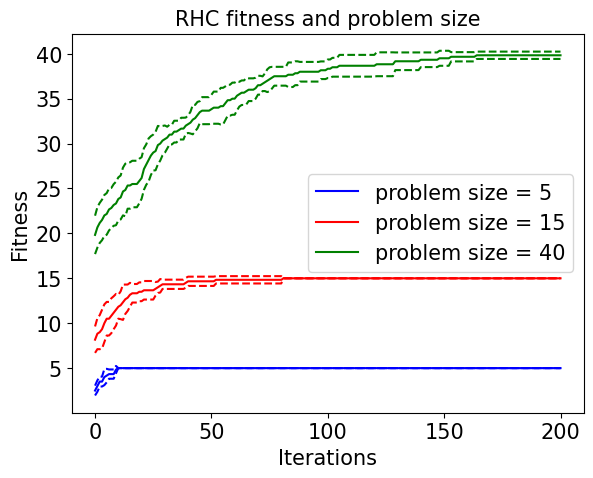

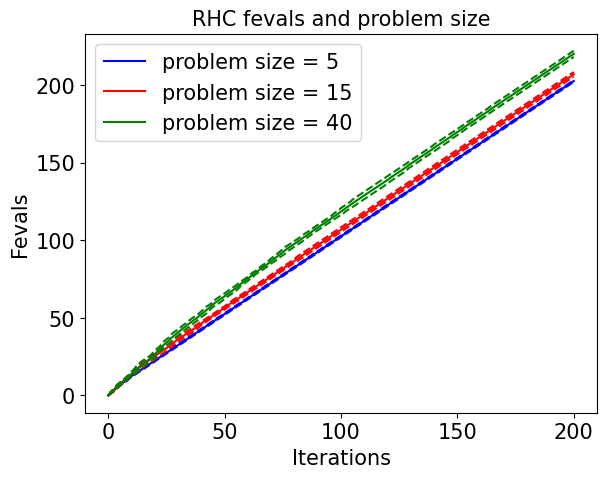

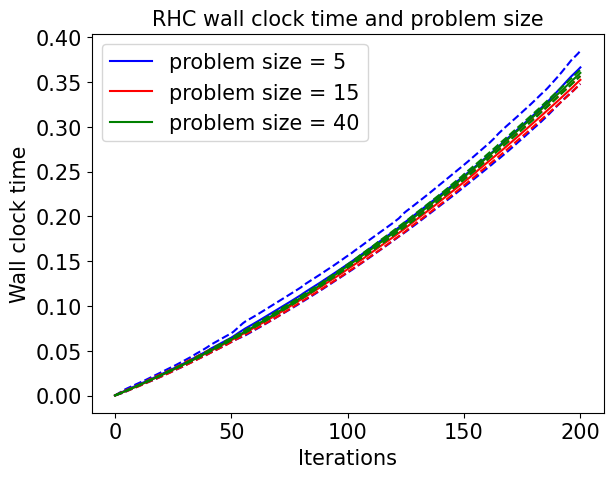

In [13]:
fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values, label=f'problem size = {size_list[0]}',
        color='b')
ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values + df_fitness_small['std'].values, '--b')
ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values - df_fitness_small['std'].values, '--b')

ax.plot(df_fitness_medium['Iteration'].values, df_fitness_medium['mean'].values, label=f'problem size = {size_list[1]}',
        color='r')
ax.plot(df_fitness_medium['Iteration'].values, df_fitness_medium['mean'].values + df_fitness_medium['std'].values, '--r')
ax.plot(df_fitness_medium['Iteration'].values, df_fitness_medium['mean'].values - df_fitness_medium['std'].values, '--r')

ax.plot(df_fitness_large['Iteration'].values, df_fitness_large['mean'].values, label=f'problem size = {size_list[2]}',
        color='g')
ax.plot(df_fitness_large['Iteration'].values, df_fitness_large['mean'].values + df_fitness_large['std'].values, '--g')
ax.plot(df_fitness_large['Iteration'].values, df_fitness_large['mean'].values - df_fitness_large['std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('RHC fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, df_fevals_small['mean'].values, label=f'problem size = {size_list[0]}',
        color='b')
ax.plot(df_fitness_small['Iteration'].values, df_fevals_small['mean'].values + df_fevals_small['std'].values, '--b')
ax.plot(df_fitness_small['Iteration'].values, df_fevals_small['mean'].values - df_fevals_small['std'].values, '--b')

ax.plot(df_fitness_medium['Iteration'].values,df_fevals_medium['mean'].values, label=f'problem size = {size_list[1]}',
        color='r')
ax.plot(df_fitness_medium['Iteration'].values,df_fevals_medium['mean'].values + df_fevals_medium['std'].values, '--r')
ax.plot(df_fitness_medium['Iteration'].values,df_fevals_medium['mean'].values - df_fevals_medium['std'].values, '--r')

ax.plot(df_fitness_large['Iteration'].values, df_fevals_large['mean'].values, label=f'problem size = {size_list[2]}',
        color='g')
ax.plot(df_fitness_large['Iteration'].values, df_fevals_large['mean'].values + df_fevals_large['std'].values, '--g')
ax.plot(df_fitness_large['Iteration'].values, df_fevals_large['mean'].values - df_fevals_large['std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('RHC fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, df_time_small['mean'].values, label=f'problem size = {size_list[0]}',
        color='b')
ax.plot(df_fitness_small['Iteration'].values, df_time_small['mean'].values + df_time_small['std'].values, '--b')
ax.plot(df_fitness_small['Iteration'].values, df_time_small['mean'].values - df_time_small['std'].values, '--b')

ax.plot(df_fitness_medium['Iteration'].values,df_time_medium['mean'].values, label=f'problem size = {size_list[1]}',
        color='r')
ax.plot(df_fitness_medium['Iteration'].values,df_time_medium['mean'].values + df_time_medium['std'].values, '--r')
ax.plot(df_fitness_medium['Iteration'].values,df_time_medium['mean'].values - df_time_medium['std'].values, '--r')

ax.plot(df_fitness_large['Iteration'].values, df_time_large['mean'].values, label=f'problem size = {size_list[2]}',
        color='g')
ax.plot(df_fitness_large['Iteration'].values, df_time_large['mean'].values + df_time_large['std'].values, '--g')
ax.plot(df_fitness_large['Iteration'].values, df_time_large['mean'].values - df_time_large['std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('RHC wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

In [4]:
#a = df_fitness_large['mean'].values - df_fitness_large['std'].values
a = df_fitness_large['mean'].values
a.shape

(201,)

#### 1b) Simulated Annealing

In [5]:
# Small set
size = 5

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='onemax_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,201),
              max_attempts=500,
              temperature_list=[0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.5, 10, 20],
              decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_small = df_run_stats[['Iteration']]
df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_small = df_run_stats[['Iteration']]
df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_small = df_run_stats[['Iteration']]
df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_small['std'] = df_time_seed[column_list].std(axis=1)

df_sa_small = df_run_stats[['Iteration']]
df_sa_small['Fitness_mean'] = df_fitness_small['mean']
df_sa_small['Fitness_std']  = df_fitness_small['std']
df_sa_small['FEvals_mean']  = df_fevals_small['mean']
df_sa_small['FEvals_std']   = df_fevals_small['std']
df_sa_small['Time_mean']    = df_time_small['mean']
df_sa_small['Time_std']     = df_time_small['std']
df_sa_small['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)

df_sa_small.to_csv('df_sa_small.csv')

In [6]:
best_fitness_sa_small = df_sa_small['Fitness_mean'].max()
best_runs_sa_small = df_sa_small[df_sa_small['Fitness_mean'] == best_fitness_sa_small]
best_runs_sa_small.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
17,17,5.0,0.0,19.5,0.547723,0.022113,0.002303,0.001
18,18,5.0,0.0,20.5,0.547723,0.023532,0.002470,0.001
19,19,5.0,0.0,21.5,0.547723,0.024982,0.002748,0.001
20,20,5.0,0.0,22.5,0.547723,0.026562,0.003213,0.001
21,21,5.0,0.0,23.5,0.547723,0.028000,0.003440,0.001


In [7]:
minimum_evaluations_sa_small = best_runs_sa_small['FEvals_mean'].min()
best_curve_run_sa_small = best_runs_sa_small[best_runs_sa_small['FEvals_mean'] == minimum_evaluations_sa_small]
minimum_time_sa_small = best_curve_run_sa_small['Time_mean'].min()
best_curve_run_sa_small = best_curve_run_sa_small[best_curve_run_sa_small['Time_mean'] == minimum_time_sa_small]
best_curve_run_sa_small

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
17,17,5.0,0.0,19.5,0.547723,0.022113,0.002303,0.001


In [8]:
# Medium set
size = 15

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='onemax_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,201),
              max_attempts=500,
              temperature_list=[0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.5, 10],
              decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_medium = df_run_stats[['Iteration']]
df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_medium = df_run_stats[['Iteration']]
df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_medium = df_run_stats[['Iteration']]
df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_medium['std'] = df_time_seed[column_list].std(axis=1)

df_sa_medium = df_run_stats[['Iteration']]
df_sa_medium['Fitness_mean'] = df_fitness_medium['mean']
df_sa_medium['Fitness_std']  = df_fitness_medium['std']
df_sa_medium['FEvals_mean']  = df_fevals_medium['mean']
df_sa_medium['FEvals_std']   = df_fevals_medium['std']
df_sa_medium['Time_mean']    = df_time_medium['mean']
df_sa_medium['Time_std']     = df_time_medium['std']
df_sa_medium['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)

df_sa_medium.to_csv('df_sa_medium.csv')

In [9]:
best_fitness_sa_medium = df_sa_medium['Fitness_mean'].max()
best_runs_sa_medium = df_sa_medium[df_sa_medium['Fitness_mean'] == best_fitness_sa_medium]
best_runs_sa_medium.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
70,70,15.0,0.0,76.833333,1.47196,0.112605,0.012022,0.001
71,71,15.0,0.0,77.833333,1.47196,0.114442,0.012164,0.001
72,72,15.0,0.0,78.833333,1.47196,0.116269,0.012306,0.001
73,73,15.0,0.0,79.833333,1.47196,0.118097,0.012448,0.001
74,74,15.0,0.0,80.833333,1.47196,0.119999,0.012560,0.001


In [10]:
minimum_evaluations_sa_medium = best_runs_sa_medium['FEvals_mean'].min()
best_curve_run_sa_medium = best_runs_sa_medium[best_runs_sa_medium['FEvals_mean'] == minimum_evaluations_sa_medium]
minimum_time_sa_medium = best_curve_run_sa_medium['Time_mean'].min()
best_curve_run_sa_medium = best_curve_run_sa_medium[best_curve_run_sa_medium['Time_mean'] == minimum_time_sa_medium]
best_curve_run_sa_medium

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
70,70,15.0,0.0,76.833333,1.47196,0.112605,0.012022,0.001


In [11]:
# Large set
size = 40

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='onemax_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,301),
              max_attempts=500,
              temperature_list=[0.001, 0.0025, 0.005, 0.01],
              decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()        
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}']  = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}']    = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_sa_large = df_run_stats[['Iteration']]
df_sa_large['Fitness_mean'] = df_fitness_large['mean']
df_sa_large['Fitness_std']  = df_fitness_large['std']
df_sa_large['FEvals_mean']  = df_fevals_large['mean']
df_sa_large['FEvals_std']   = df_fevals_large['std']
df_sa_large['Time_mean']    = df_time_large['mean']
df_sa_large['Time_std']     = df_time_large['std']
df_sa_large['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)

df_sa_large.to_csv('df_sa_large.csv')

In [25]:
df_sa_large = pd.read_csv('df_sa_large.csv')
best_fitness_sa_large = df_sa_large['Fitness_mean'].max()
best_runs_sa_large = df_sa_large[df_sa_large['Fitness_mean'] == best_fitness_sa_large]
best_runs_sa_large.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
222,222,222,40.0,0.0,242.166667,2.136976,0.472572,0.023649,0.001
223,223,223,40.0,0.0,243.166667,2.136976,0.475492,0.023696,0.001
224,224,224,40.0,0.0,244.166667,2.136976,0.478462,0.023821,0.001
225,225,225,40.0,0.0,245.166667,2.136976,0.481424,0.023918,0.001
226,226,226,40.0,0.0,246.166667,2.136976,0.484455,0.023942,0.001


In [26]:
minimum_evaluations_sa_large = best_runs_sa_large['FEvals_mean'].min()
best_curve_run_sa_large = best_runs_sa_large[best_runs_sa_large['FEvals_mean'] == minimum_evaluations_sa_large]
minimum_time_sa_large = best_curve_run_sa_large['Time_mean'].min()
best_curve_run_sa_large = best_curve_run_sa_large[best_curve_run_sa_large['Time_mean'] == minimum_time_sa_large]
best_curve_run_sa_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
222,222,222,40.0,0.0,242.166667,2.136976,0.472572,0.023649,0.001


In [27]:
minimum_time_sa_large = best_runs_sa_large['Time_mean'].min()
best_curve_run_sa_large = best_runs_sa_large[best_runs_sa_large['Time_mean'] == minimum_time_sa_large]
best_curve_run_sa_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
222,222,222,40.0,0.0,242.166667,2.136976,0.472572,0.023649,0.001


In [183]:
# Very Large set
size = 500

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='onemax_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,701),
              max_attempts=500,
              temperature_list=[0.001, 0.0025, 0.005],
              decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()        
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}']  = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}']    = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_verylarge = df_run_stats[['Iteration']]
df_fitness_verylarge['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_verylarge['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_verylarge = df_run_stats[['Iteration']]
df_fevals_verylarge['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_verylarge['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_verylarge = df_run_stats[['Iteration']]
df_time_verylarge['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_verylarge['std'] = df_time_seed[column_list].std(axis=1)

df_sa_verylarge = df_run_stats[['Iteration']]
df_sa_verylarge['Fitness_mean'] = df_fitness_verylarge['mean']
df_sa_verylarge['Fitness_std']  = df_fitness_verylarge['std']
df_sa_verylarge['FEvals_mean']  = df_fevals_verylarge['mean']
df_sa_verylarge['FEvals_std']   = df_fevals_verylarge['std']
df_sa_verylarge['Time_mean']    = df_time_verylarge['mean']
df_sa_verylarge['Time_std']     = df_time_verylarge['std']
df_sa_verylarge['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)

In [184]:
best_fitness_sa_verylarge = df_sa_verylarge['Fitness_mean'].max()
best_runs_sa_verylarge = df_sa_verylarge[df_sa_verylarge['Fitness_mean'] == best_fitness_sa_verylarge]
best_runs_sa_verylarge.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
698,698,435.8,4.969909,884.8,8.526429,5.297198,1.289368,0.0010
699,699,435.8,4.969909,885.8,8.526429,5.310271,1.291881,0.0010
700,700,435.8,4.969909,886.8,8.526429,5.325039,1.296529,0.0010
1399,698,435.8,4.969909,884.8,8.526429,10.643028,1.923965,0.0025
1400,699,435.8,4.969909,885.8,8.526429,10.661834,1.925740,0.0025


In [185]:
minimum_evaluations_sa_verylarge = best_runs_sa_verylarge['FEvals_mean'].min()
best_curve_run_sa_verylarge = best_runs_sa_verylarge[best_runs_sa_verylarge['FEvals_mean'] == minimum_evaluations_sa_verylarge]
minimum_time_sa_verylarge = best_curve_run_sa_verylarge['Time_mean'].min()
best_curve_run_sa_verylarge = best_curve_run_sa_verylarge[best_curve_run_sa_verylarge['Time_mean'] == minimum_time_sa_verylarge]
best_curve_run_sa_verylarge

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
698,698,435.8,4.969909,884.8,8.526429,5.297198,1.289368,0.001


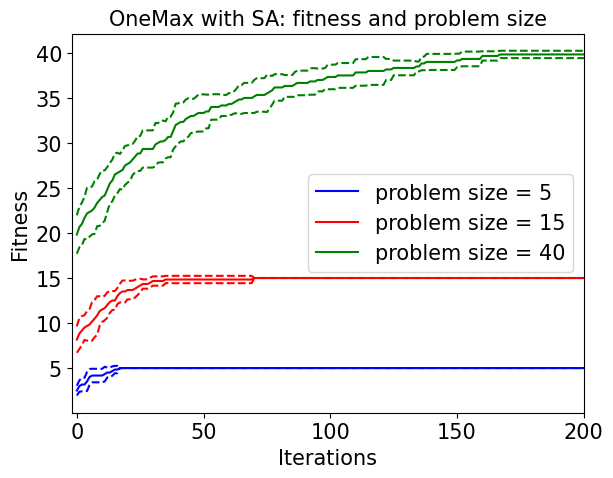

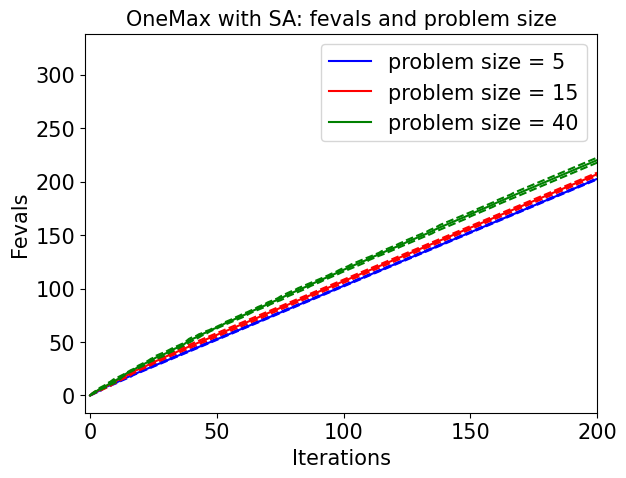

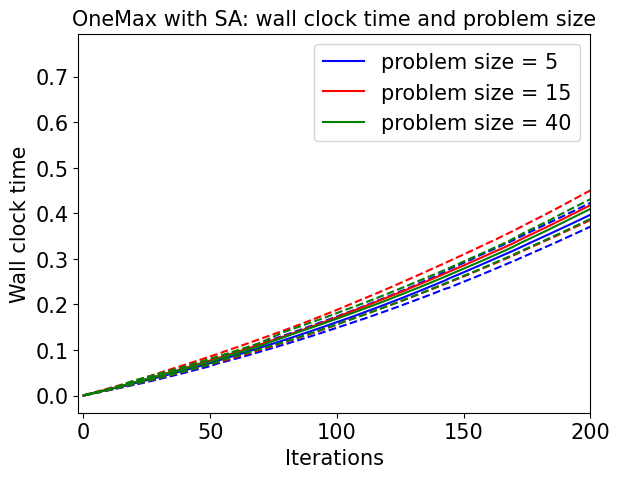

In [14]:
fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values, 
        label='problem size = 5',color='b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values, '--b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values, '--b')

ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_mean'].values, 
        label='problem size = 15', color='r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_std'].values, '--r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_std'].values, '--r')

ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_mean'].values, 
        label='problem size = 40', color='g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_std'].values, '--g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('OneMax with SA: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 200)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values, 
        label='problem size = 5',color='b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, '--b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, '--b')

ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_mean'].values, 
        label='problem size = 15', color='r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_std'].values, '--r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_std'].values, '--r')

ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_mean'].values, 
        label='problem size = 40', color='g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_std'].values, '--g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('OneMax with SA: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 200)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values, 
        label='problem size = 5',color='b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, '--b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, '--b')

ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_mean'].values, 
        label='problem size = 15', color='r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_std'].values, '--r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_std'].values, '--r')

ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.001]['Time_mean'].values, 
        label='problem size = 40', color='g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_std'].values, '--g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('OneMax with SA: wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 200)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

#### 1c) Genetic Algorithm

In [169]:
# Very Large set
size =100

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='onemax_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,201),
              max_attempts=500,
              population_sizes=[5, 10, 20, 40, 100, 200],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_verylarge = df_run_stats[['Iteration']]
df_fitness_verylarge['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_verylarge['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_verylarge = df_run_stats[['Iteration']]
df_fevals_verylarge['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_verylarge['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_verylarge = df_run_stats[['Iteration']]
df_time_verylarge['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_verylarge['std'] = df_time_seed[column_list].std(axis=1)

df_ga_verylarge = df_run_stats[['Iteration']]
df_ga_verylarge['Fitness_mean'] = df_fitness_verylarge['mean']
df_ga_verylarge['Fitness_std']  = df_fitness_verylarge['std']
df_ga_verylarge['FEvals_mean']  = df_fevals_verylarge['mean']
df_ga_verylarge['FEvals_std']   = df_fevals_verylarge['std']
df_ga_verylarge['Time_mean']    = df_time_verylarge['mean']
df_ga_verylarge['Time_std']     = df_time_verylarge['std']
df_ga_verylarge['Population Size']  = df_run_stats[['Population Size']]
df_ga_verylarge['Mutation Rate']  = df_run_stats[['Mutation Rate']]

In [171]:
best_fitness_ga_verylarge = df_ga_verylarge['Fitness_mean'].max()
best_runs_ga_verylarge = df_ga_verylarge[df_ga_verylarge['Fitness_mean'] == best_fitness_ga_verylarge]
best_runs_ga_verylarge.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
2176,166,100.0,0.0,3537.8,1.788854,3.696992,0.810182,20,0.2
2177,167,100.0,0.0,3558.8,1.788854,3.720200,0.815507,20,0.2
2178,168,100.0,0.0,3579.8,1.788854,3.742900,0.820459,20,0.2
2179,169,100.0,0.0,3600.8,1.788854,3.769663,0.833519,20,0.2
2180,170,100.0,0.0,3621.8,1.788854,3.793885,0.840473,20,0.2


In [172]:
minimum_evaluations_ga_verylarge = best_runs_ga_verylarge['FEvals_mean'].min()
best_curve_run_ga_verylarge = best_runs_ga_verylarge[best_runs_ga_verylarge['FEvals_mean'] == minimum_evaluations_ga_verylarge]
minimum_time_ga_verylarge = best_curve_run_ga_verylarge['Time_mean'].min()
best_curve_run_ga_verylarge = best_curve_run_ga_verylarge[best_curve_run_ga_verylarge['Time_mean'] == minimum_time_ga_verylarge]
best_curve_run_ga_verylarge

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
2525,113,100.0,0.0,2422.6,4.219005,2.885478,0.400395,20,0.4


In [15]:
# Large set
size =40

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='onemax_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,101),
              max_attempts=500,
              population_sizes=[5,10, 20, 40, 100, 200],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_ga_large = df_run_stats[['Iteration']]
df_ga_large['Fitness_mean'] = df_fitness_large['mean']
df_ga_large['Fitness_std']  = df_fitness_large['std']
df_ga_large['FEvals_mean']  = df_fevals_large['mean']
df_ga_large['FEvals_std']   = df_fevals_large['std']
df_ga_large['Time_mean']    = df_time_large['mean']
df_ga_large['Time_std']     = df_time_large['std']
df_ga_large['Population Size']  = df_run_stats[['Population Size']]
df_ga_large['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_large.to_csv('df_ga_large.csv')

In [12]:
df_ga_large = pd.read_csv('df_ga_large.csv')
best_fitness_ga_large = df_ga_large['Fitness_mean'].max()
best_runs_ga_large = df_ga_large[df_ga_large['Fitness_mean'] == best_fitness_ga_large]
best_runs_ga_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
701,701,95,40.0,0.0,1068.333333,1.632993,0.766160,0.203760,10,0.3
702,702,96,40.0,0.0,1079.333333,1.632993,0.774947,0.205291,10,0.3
703,703,97,40.0,0.0,1090.333333,1.632993,0.783530,0.206840,10,0.3
704,704,98,40.0,0.0,1101.333333,1.632993,0.792074,0.208431,10,0.3
705,705,99,40.0,0.0,1112.333333,1.632993,0.800720,0.209766,10,0.3
...,...,...,...,...,...,...,...,...,...,...
3025,3025,96,40.0,0.0,19504.666667,1.032796,4.190881,0.378867,200,0.6
3026,3026,97,40.0,0.0,19705.666667,1.032796,4.230816,0.382001,200,0.6
3027,3027,98,40.0,0.0,19906.666667,1.032796,4.270960,0.386001,200,0.6
3028,3028,99,40.0,0.0,20107.666667,1.032796,4.310120,0.388220,200,0.6


In [16]:
minimum_evaluations_ga_large = best_runs_ga_large['FEvals_mean'].min()
best_curve_run_ga_large = best_runs_ga_large[best_runs_ga_large['FEvals_mean'] == minimum_evaluations_ga_large]
minimum_time_ga_large = best_curve_run_ga_large['Time_mean'].min()
best_curve_run_ga_large = best_curve_run_ga_large[best_curve_run_ga_large['Time_mean'] == minimum_time_ga_large]
best_curve_run_ga_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
972,972,63,40.0,0.0,716.166667,1.47196,0.620418,0.064203,10,0.6


In [17]:
minimum_time_ga_large = best_runs_ga_large['Time_mean'].min()
best_curve_run_ga_large = best_runs_ga_large[best_runs_ga_large['Time_mean'] == minimum_time_ga_large]
best_curve_run_ga_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
2139,2139,18,40.0,0.0,1927.333333,1.21106,0.434084,0.048946,100,0.3


In [77]:
df_temp = df_ga_large[df_ga_large['Population Size']==200][df_ga_large['Mutation Rate']==0.3]

best_fitness_temp = df_temp['Fitness_mean'].max()
best_runs_temp = df_temp[df_temp['Fitness_mean'] == best_fitness_temp]

minimum_time_temp = best_runs_temp['Time_mean'].min()
best_curve_run_temp = best_runs_temp[best_runs_temp['Time_mean'] == minimum_time_temp]
best_curve_run_temp

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
2644,2644,18,40.0,0.0,3825.666667,1.632993,0.658944,0.056335,200,0.3


In [81]:
df_temp = df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.3]

best_fitness_temp = df_temp['Fitness_mean'].max()
best_runs_temp = df_temp[df_temp['Fitness_mean'] == best_fitness_temp]

minimum_time_temp = best_runs_temp['Time_mean'].min()
best_curve_run_temp = best_runs_temp[best_runs_temp['Time_mean'] == minimum_time_temp]
best_curve_run_temp

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1168,1168,57,40.0,0.0,1229.166667,2.483277,0.656124,0.07546,20,0.3


In [18]:
# Medium set
size = 15

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='onemax_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,101),
              max_attempts=10,
              population_sizes=[2, 5, 10, 15, 20, 50],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_medium = df_run_stats[['Iteration']]
df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_medium = df_run_stats[['Iteration']]
df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_medium = df_run_stats[['Iteration']]
df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_medium['std'] = df_time_seed[column_list].std(axis=1)

df_ga_medium = df_run_stats[['Iteration']]
df_ga_medium['Fitness_mean'] = df_fitness_medium['mean']
df_ga_medium['Fitness_std']  = df_fitness_medium['std']
df_ga_medium['FEvals_mean']  = df_fevals_medium['mean']
df_ga_medium['FEvals_std']   = df_fevals_medium['std']
df_ga_medium['Time_mean']    = df_time_medium['mean']
df_ga_medium['Time_std']     = df_time_medium['std']
df_ga_medium['Population Size']  = df_run_stats[['Population Size']]
df_ga_medium['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_medium.to_csv('df_ga_medium.csv')

In [18]:
df_ga_medium = pd.read_csv('df_ga_medium.csv')
best_fitness_ga_medium = df_ga_medium['Fitness_mean'].max()
best_runs_ga_medium = df_ga_medium[df_ga_medium['Fitness_mean'] == best_fitness_ga_medium]
best_runs_ga_medium.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1239,1239,27,15.0,0.0,288.333333,27.500303,0.253547,0.047765,10,0.4
1240,1240,28,15.0,0.0,293.833333,33.307156,0.258164,0.047387,10,0.4
1241,1241,29,15.0,0.0,299.333333,39.179927,0.262541,0.047451,10,0.4
1242,1242,30,15.0,0.0,304.833333,45.092867,0.267014,0.048024,10,0.4
1243,1243,31,15.0,0.0,310.333333,51.032016,0.271367,0.049013,10,0.4


In [19]:
minimum_evaluations_ga_medium = best_runs_ga_medium['FEvals_mean'].min()
best_curve_run_ga_medium = best_runs_ga_medium[best_runs_ga_medium['FEvals_mean'] == minimum_evaluations_ga_medium]
minimum_time_ga_medium = best_curve_run_ga_medium['Time_mean'].min()
best_curve_run_ga_medium = best_curve_run_ga_medium[best_curve_run_ga_medium['Time_mean'] == minimum_time_ga_medium]
best_curve_run_ga_medium

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1931,1931,12,15.0,0.0,211.0,0.894427,0.164443,0.006756,15,0.6


In [20]:
minimum_time_ga_medium = best_runs_ga_medium['Time_mean'].min()
best_curve_run_ga_medium = best_runs_ga_medium[best_runs_ga_medium['Time_mean'] == minimum_time_ga_medium]
best_curve_run_ga_medium

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
2533,2533,8,15.0,0.0,461.833333,1.169045,0.158985,0.016452,50,0.2


In [58]:
# Small set
size = 5

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='onemax_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,101),
              max_attempts=10,
              population_sizes=[2, 5, 10, 15, 20, 50],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_small = df_run_stats[['Iteration']]
df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_small = df_run_stats[['Iteration']]
df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_small = df_run_stats[['Iteration']]
df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_small['std'] = df_time_seed[column_list].std(axis=1)

df_ga_small = df_run_stats[['Iteration']]
df_ga_small['Fitness_mean'] = df_fitness_small['mean']
df_ga_small['Fitness_std']  = df_fitness_small['std']
df_ga_small['FEvals_mean']  = df_fevals_small['mean']
df_ga_small['FEvals_std']   = df_fevals_small['std']
df_ga_small['Time_mean']    = df_time_small['mean']
df_ga_small['Time_std']     = df_time_small['std']
df_ga_small['Population Size']  = df_run_stats[['Population Size']]
df_ga_small['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_small.to_csv('df_ga_small.csv')

In [21]:
df_ga_medium = pd.read_csv('df_ga_medium.csv')
best_fitness_ga_small = df_ga_small['Fitness_mean'].max()
best_runs_ga_small = df_ga_small[df_ga_small['Fitness_mean'] == best_fitness_ga_small]
best_runs_ga_small.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
518,518,13,5.0,0.0,82.0,5.513620,0.066979,0.009178,5,0.2
519,519,14,5.0,0.0,85.0,8.074652,0.069595,0.010380,5,0.2
520,520,15,5.0,0.0,88.0,11.027239,0.072202,0.012186,5,0.2
521,521,16,5.0,0.0,89.0,12.312595,0.073040,0.012632,5,0.2
522,522,17,5.0,0.0,90.0,13.914022,0.073919,0.013425,5,0.2


In [22]:
minimum_evaluations_ga_small = best_runs_ga_small['FEvals_mean'].min()
best_curve_run_ga_small = best_runs_ga_small[best_runs_ga_small['FEvals_mean'] == minimum_evaluations_ga_small]
minimum_time_ga_small = best_curve_run_ga_small['Time_mean'].min()
best_curve_run_ga_small = best_curve_run_ga_small[best_curve_run_ga_small['Time_mean'] == minimum_time_ga_small]
best_curve_run_ga_small

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1517,1517,2,5.0,0.0,48.5,0.547723,0.026883,0.005969,15,0.2


In [23]:
minimum_time_ga_small = best_runs_ga_small['Time_mean'].min()
best_curve_run_ga_small = best_runs_ga_small[best_runs_ga_small['Time_mean'] == minimum_time_ga_small]
best_curve_run_ga_small

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
2526,2526,1,5.0,0.0,102.0,0.0,0.025034,0.005558,50,0.2


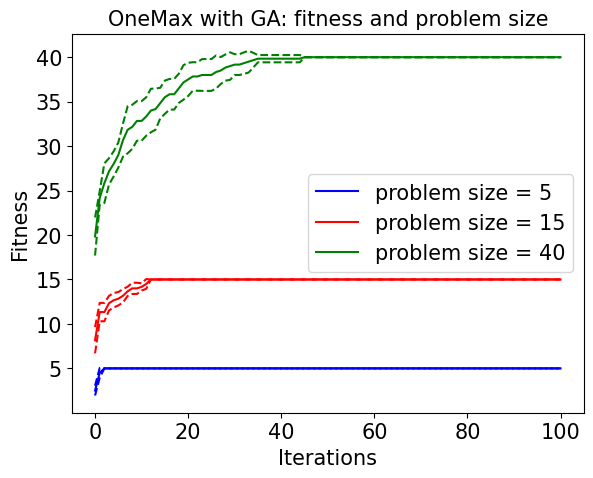

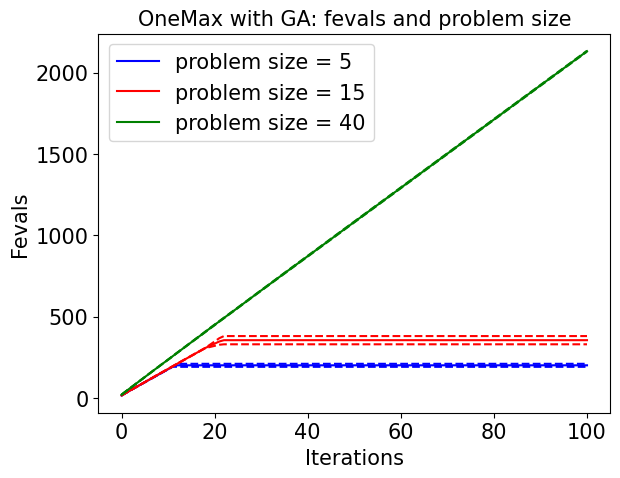

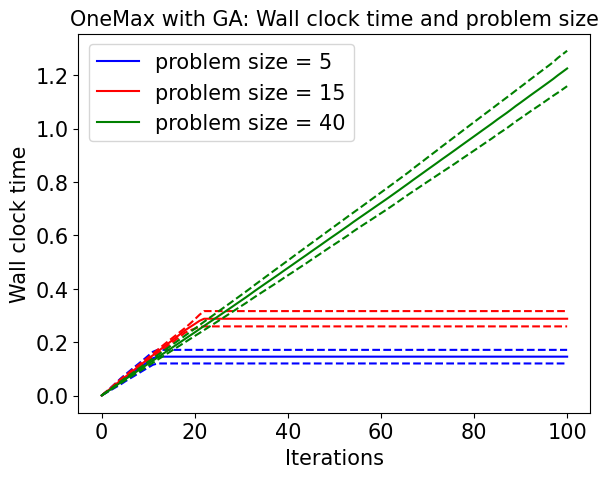

In [24]:
fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values, 
        label='problem size = 5', color='b')
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values +
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values,
        '--b')
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values -
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values, 
        '--b')

ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Fitness_mean'].values, 
        label='problem size = 15', color='r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Fitness_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Fitness_std'].values,
        '--r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Fitness_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Fitness_std'].values, 
        '--r')

ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Fitness_mean'].values, 
        label='problem size = 40', color='g')
ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Fitness_mean'].values +
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Fitness_std'].values, 
        '--g')
ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Fitness_mean'].values -
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Fitness_std'].values, 
        '--g')

ax.legend(fontsize=fontsize)
ax.set_title('OneMax with GA: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values, 
        label='problem size = 5', color='b')
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values +
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values,
        '--b')
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values -
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values, 
        '--b')

ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['FEvals_mean'].values, 
        label='problem size = 15', color='r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['FEvals_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['FEvals_std'].values,
        '--r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['FEvals_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['FEvals_std'].values, 
        '--r')

ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['FEvals_mean'].values, 
        label='problem size = 40', color='g')
ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['FEvals_mean'].values +
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['FEvals_std'].values, 
        '--g')
ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['FEvals_mean'].values -
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['FEvals_std'].values, 
        '--g')

ax.legend(fontsize=fontsize)
ax.set_title('OneMax with GA: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values, 
        label='problem size = 5', color='b')
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Time_std'].values,
        '--b')
ax.plot(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Time_std'].values, 
        '--b')

ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Time_mean'].values, 
        label='problem size = 15', color='r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Time_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Time_std'].values,
        '--r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Time_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==15][df_ga_medium['Mutation Rate']==0.6]['Time_std'].values, 
        '--r')

ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Time_mean'].values, 
        label='problem size = 40', color='g')
ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Time_mean'].values +
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Time_std'].values, 
        '--g')
ax.plot(df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Time_mean'].values -
        df_ga_large[df_ga_large['Population Size']==20][df_ga_large['Mutation Rate']==0.4]['Time_std'].values, 
        '--g')

ax.legend(fontsize=fontsize)
ax.set_title('OneMax with GA: Wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

#### 1d) Mimic

In [85]:
# Large set
size = 40

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    mmc = MIMICRunner(problem=problem,
                      experiment_name='onemax_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[10, 20, 50, 100],
                      keep_percent_list=[0.25, 0.5, 0.75])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_large = df_run_stats[['Iteration']]
df_mmc_large['Fitness_mean'] = df_fitness_large['mean']
df_mmc_large['Fitness_std']  = df_fitness_large['std']
df_mmc_large['FEvals_mean']  = df_fevals_large['mean']
df_mmc_large['FEvals_std']   = df_fevals_large['std']
df_mmc_large['Time_mean']    = df_time_large['mean']
df_mmc_large['Time_std']     = df_time_large['std']
df_mmc_large['Population Size']  = df_run_stats[['Population Size']]
df_mmc_large['Keep Percent']  = df_run_stats[['Keep Percent']]

In [87]:
best_fitness_mmc_large = df_mmc_large['Fitness_mean'].max()
best_runs_mmc_large = df_mmc_large[df_mmc_large['Fitness_mean'] == best_fitness_mmc_large]
best_runs_mmc_large.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
728,21,39.833333,0.408248,1128.166667,0.408248,14.729612,2.137292,50,0.5
729,22,39.833333,0.408248,1179.166667,0.408248,15.354315,2.224170,50,0.5
730,23,39.833333,0.408248,1230.166667,0.408248,15.992433,2.316902,50,0.5
731,24,39.833333,0.408248,1281.166667,0.408248,16.611621,2.386408,50,0.5
732,25,39.833333,0.408248,1332.166667,0.408248,17.271538,2.498919,50,0.5


In [88]:
minimum_evaluations_mmc_large = best_runs_mmc_large['FEvals_mean'].min()
best_curve_run_mmc_large = best_runs_mmc_large[best_runs_mmc_large['FEvals_mean'] == minimum_evaluations_mmc_large]
minimum_time_mmc_large = best_curve_run_mmc_large['Time_mean'].min()
best_curve_run_mmc_large = best_curve_run_mmc_large[best_curve_run_mmc_large['Time_mean'] == minimum_time_mmc_large]
best_curve_run_mmc_large

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
917,8,39.833333,0.408248,913.333333,1.032796,5.196723,0.380906,100,0.25


In [89]:
df_mmc_large.to_csv('df_mmc_large_size40.csv')

In [25]:
# Medium set
size = 15

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    mmc = MIMICRunner(problem=problem,
                      experiment_name='onemax_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[10, 20, 50, 100],
                      keep_percent_list=[0.25, 0.5, 0.75])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_medium = df_run_stats[['Iteration']]
df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_medium = df_run_stats[['Iteration']]
df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_medium = df_run_stats[['Iteration']]
df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_medium['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_medium = df_run_stats[['Iteration']]
df_mmc_medium['Fitness_mean'] = df_fitness_medium['mean']
df_mmc_medium['Fitness_std']  = df_fitness_medium['std']
df_mmc_medium['FEvals_mean']  = df_fevals_medium['mean']
df_mmc_medium['FEvals_std']   = df_fevals_medium['std']
df_mmc_medium['Time_mean']    = df_time_medium['mean']
df_mmc_medium['Time_std']     = df_time_medium['std']
df_mmc_medium['Population Size']  = df_run_stats[['Population Size']]
df_mmc_medium['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_medium.to_csv('df_mmc_medium_size15.csv')

In [26]:
best_fitness = df_mmc_medium['Fitness_mean'].max()
best_runs = df_mmc_medium[df_mmc_medium['Fitness_mean'] == best_fitness]
best_runs.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
713,6,15.0,0.0,359.333333,0.816497,0.647106,0.085654,50,0.5
714,7,15.0,0.0,410.333333,0.816497,0.754771,0.092300,50,0.5
715,8,15.0,0.0,461.333333,0.816497,0.866211,0.106052,50,0.5
716,9,15.0,0.0,512.333333,0.816497,0.973797,0.120639,50,0.5
717,10,15.0,0.0,563.333333,0.816497,1.077943,0.131659,50,0.5


In [27]:
minimum_evaluations = best_runs['FEvals_mean'].min()
best_curve_run = best_runs[best_runs['FEvals_mean'] == minimum_evaluations]
best_curve_run.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
713,6,15.0,0.0,359.333333,0.816497,0.647106,0.085654,50,0.5


In [20]:
# Small set
size = 5

# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.OneMax()
    
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

i = 0
seed_list = [1, 2, 3, 4, 5, 6]
for seed in seed_list:
    i += 1
    mmc = MIMICRunner(problem=problem,
                      experiment_name='onemax_mmc',
                      output_directory=None,
                      seed=seed,
                      iteration_list=np.arange(1,101),
                      max_attempts=500,
                      population_sizes=[2, 5, 10, 15, 20, 50],
                      keep_percent_list=[0.25, 0.5, 0.75])
        # the two data frames will contain the results
    df_run_stats, df_run_curves = mmc.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_small = df_run_stats[['Iteration']]
df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_small = df_run_stats[['Iteration']]
df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_small = df_run_stats[['Iteration']]
df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_small['std'] = df_time_seed[column_list].std(axis=1)

df_mmc_small = df_run_stats[['Iteration']]
df_mmc_small['Fitness_mean'] = df_fitness_small['mean']
df_mmc_small['Fitness_std']  = df_fitness_small['std']
df_mmc_small['FEvals_mean']  = df_fevals_small['mean']
df_mmc_small['FEvals_std']   = df_fevals_small['std']
df_mmc_small['Time_mean']    = df_time_small['mean']
df_mmc_small['Time_std']     = df_time_small['std']
df_mmc_small['Population Size']  = df_run_stats[['Population Size']]
df_mmc_small['Keep Percent']  = df_run_stats[['Keep Percent']]

df_mmc_small.to_csv('df_mmc_small_size5.csv')

In [21]:
best_fitness = df_mmc_small['Fitness_mean'].max()
best_runs = df_mmc_small[df_mmc_small['Fitness_mean'] == best_fitness]
best_runs.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
1114,3,5.0,0.0,64.333333,0.516398,0.064070,0.010044,15,0.75
1115,4,5.0,0.0,80.333333,0.516398,0.084832,0.013177,15,0.75
1116,5,5.0,0.0,96.333333,0.516398,0.105454,0.017372,15,0.75
1117,6,5.0,0.0,112.333333,0.516398,0.125858,0.020670,15,0.75
1118,7,5.0,0.0,128.333333,0.516398,0.145985,0.023532,15,0.75


In [22]:
minimum_evaluations = best_runs['FEvals_mean'].min()
best_curve_run = best_runs[best_runs['FEvals_mean'] == minimum_evaluations]
best_curve_run.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Keep Percent
1214,2,5.0,0.0,63.333333,0.516398,0.042441,0.004223,20,0.25


NameError: name 'df_mmc_medium' is not defined

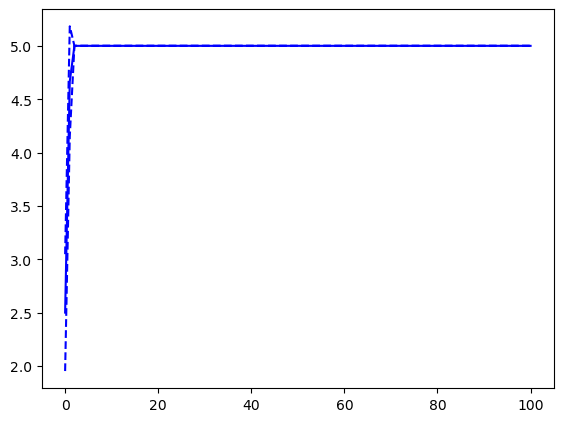

In [5]:
fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_mean'].values, label='problem size = 5', color='b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_std'].values,'--b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_std'].values, '--b')

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_mean'].values, label='problem size = 15', color='r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_std'].values,'--r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_std'].values, '--r')

ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_mean'].values, label='problem size = 40', color='g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_std'].values, '--g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('FlipFlop with MMC: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_mean'].values, label='problem size = 5', color='b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_std'].values,'--b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_std'].values, '--b')

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_mean'].values, label='problem size = 15', color='r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_std'].values,'--r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_std'].values, '--r')

ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_mean'].values, label='problem size = 40', color='g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_std'].values, '--g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('FlipFlop with MMC: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_mean'].values, label='problem size = 5', color='b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_std'].values,'--b')
ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_std'].values, '--b')

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_mean'].values, label='problem size = 15', color='r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_std'].values,'--r')
ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_std'].values, '--r')

ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_mean'].values, label='problem size = 40', color='g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_std'].values, '--g')
ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('FlipFlop with MMC: wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


In [3]:
 # Read results

df_sa_small = pd.read_csv('df_sa_small.csv') 
df_sa_medium = pd.read_csv('df_sa_medium.csv') 
df_sa_large = pd.read_csv('df_sa_large.csv') 

df_ga_small = pd.read_csv('df_ga_small.csv') 
df_ga_medium = pd.read_csv('df_ga_medium.csv') 
df_ga_large = pd.read_csv('df_ga_large.csv') 

df_mmc_small = pd.read_csv('df_mmc_small_size5.csv') 
df_mmc_medium = pd.read_csv('df_mmc_medium_size15.csv') 
df_mmc_large = pd.read_csv('df_mmc_large_size40.csv') 



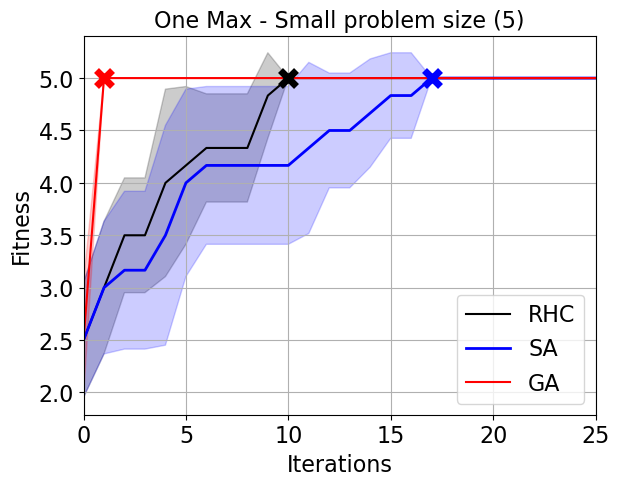

In [72]:
# Small problem size - Fitness
fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values, label='RHC',color='k')
ax.fill_between(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values + df_fitness_small['std'].values, 
                                                      df_fitness_small['mean'].values - df_fitness_small['std'].values, alpha=0.2, color="k")

#ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values + df_fitness_small['std'].values, '--k')
#ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values - df_fitness_small['std'].values, '--k')

ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values, 
        label='SA',color='b', linewidth=2)
ax.fill_between(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values,
                df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values + 
                df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values,
                df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values - 
                df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values +
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values,
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values -
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values, alpha=0.2, color="r")

#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_mean'].values +
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_std'].values,'--r')
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_mean'].values -
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Fitness_std'].values, '--r')

ax.plot(10, 5, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(17, 5, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(1,  5, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Small problem size (5)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 25)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.grid(True)
plt.show()
plt.close(fig)


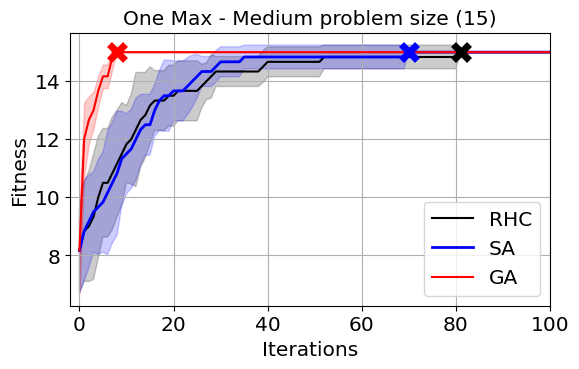

In [104]:
# Medium problem size - Fitness

fontsize = 14.5
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.14, 0.15, 0.80, 0.78])

ax.plot(df_fitness_medium['Iteration'].values, df_fitness_medium['mean'].values, label='RHC',color='k')
ax.fill_between(df_fitness_medium['Iteration'].values, df_fitness_medium['mean'].values + df_fitness_medium['std'].values, 
                                                      df_fitness_medium['mean'].values - df_fitness_medium['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_mean'].values, 
        label='SA', color='b',linewidth=2)
ax.fill_between(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
                df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_mean'].values +
                df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_std'].values, 
                df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_mean'].values -
                df_sa_medium[df_sa_medium['Temperature']==0.001]['Fitness_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Fitness_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Iteration'].values, 
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Fitness_mean'].values +
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Fitness_std'].values, 
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Fitness_mean'].values -
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Fitness_std'].values, alpha=0.2, color="r") 

#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_mean'].values +
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_std'].values,'--r')
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_mean'].values -
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Fitness_std'].values, '--r')

ax.plot(81, 15, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(70, 15, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(8,  15, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Medium problem size (15)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 100)
plt.grid(True)
plt.show()
fig.savefig('onemax_medium_fitness.png')
plt.close(fig)

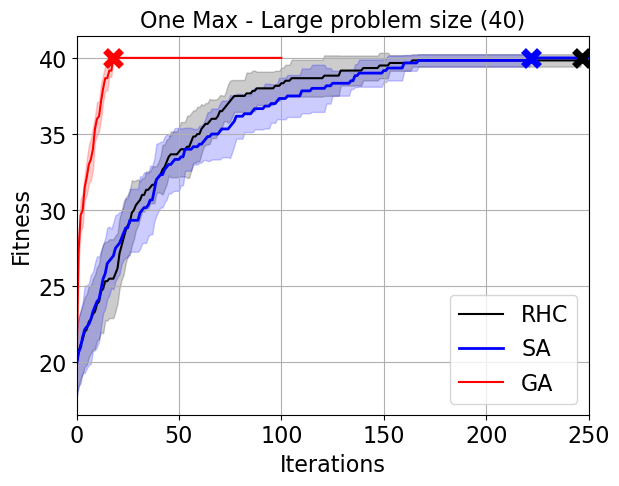

In [86]:
# Large problem size - Fitness

fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.14, 0.14, 0.80, 0.79])

ax.plot(df_fitness_large['Iteration'].values, df_fitness_large['mean'].values, label='RHC',color='k')
ax.fill_between(df_fitness_large['Iteration'].values, df_fitness_large['mean'].values + df_fitness_large['std'].values, 
                                                      df_fitness_large['mean'].values - df_fitness_large['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_mean'].values, 
        label='SA', color='b',linewidth=2)
ax.fill_between(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
                df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_mean'].values + 
                df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_std'].values, 
                df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_mean'].values - 
                df_sa_large[df_sa_large['Temperature']==0.001]['Fitness_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Fitness_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Iteration'].values, 
                df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Fitness_mean'].values +
                df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Fitness_std'].values, 
                df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Fitness_mean'].values -
                df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Fitness_std'].values, alpha=0.2, color="r")

#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_mean'].values +
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_std'].values, '--r')
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_mean'].values -
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Fitness_std'].values, '--r')

ax.plot(247, 40, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(222, 40, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(18,  40, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Large problem size (40)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 250)
plt.grid(True)
plt.show()
plt.close(fig)

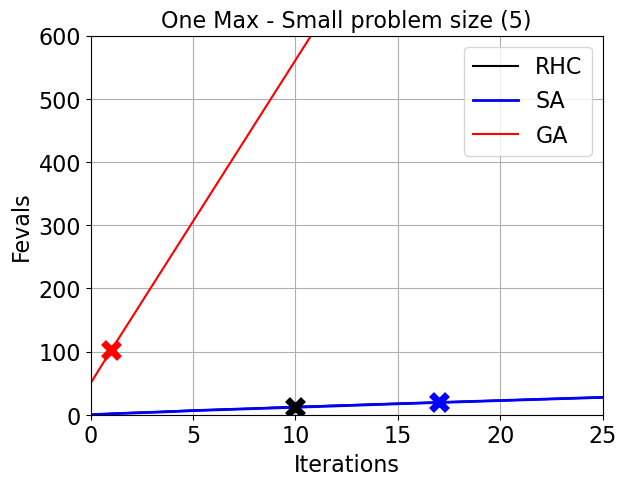

In [69]:
# Small problem size - Fevals
fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fevals_small['Iteration'].values, df_fevals_small['mean'].values, label='RHC',color='k')
ax.fill_between(df_fevals_small['Iteration'].values, df_fevals_small['mean'].values + df_fevals_small['std'].values,
                df_fevals_small['mean'].values - df_fevals_small['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values, 
        label='SA',color='b', linewidth=2)
ax.fill_between(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
                            df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values + 
                            df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values,
                            df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values - 
                            df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values -
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values,
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values +
                df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values, alpha=0.2, color="r")

#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_mean'].values +
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_std'].values,'--r')
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_mean'].values -
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['FEvals_std'].values, '--r')

ax.plot(10, 12.5, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(17, 19.5, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(1,  102, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Small problem size (5)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
ax.set_ylim(0., 600)
ax.set_xlim(0, 25)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.grid(True)
plt.show()
plt.close(fig)

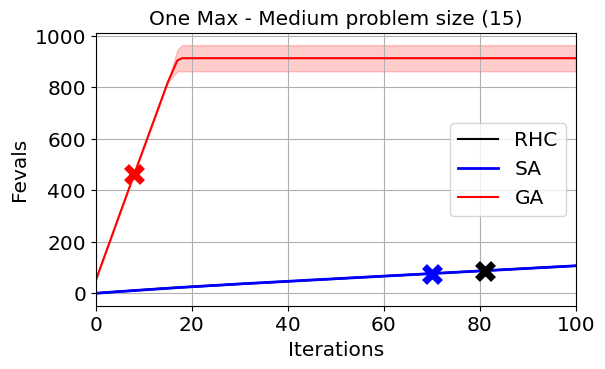

In [107]:
# Medium problem size - Fevals

fontsize = 14.5
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.15, 0.15, 0.80, 0.78])

ax.plot(df_fevals_medium['Iteration'].values, df_fevals_medium['mean'].values, label='RHC',color='k')
ax.fill_between(df_fevals_medium['Iteration'].values, df_fevals_medium['mean'].values + df_fevals_medium['std'].values,
                df_fevals_medium['mean'].values - df_fevals_medium['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_mean'].values, 
        label='SA', color='b', linewidth=2)
ax.fill_between(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
                df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_mean'].values +
                df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_std'].values,  
                df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_mean'].values -
                df_sa_medium[df_sa_medium['Temperature']==0.001]['FEvals_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['FEvals_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Iteration'].values, 
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['FEvals_mean'].values +
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['FEvals_std'].values, 
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['FEvals_mean'].values -
                df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['FEvals_std'].values, 
                alpha=0.2, color="r")

#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_mean'].values +
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_std'].values,'--r')
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_mean'].values -
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['FEvals_std'].values, '--r')

ax.plot(81, 87.83, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(70, 76.83, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(8,  461.8, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Medium problem size (15)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 100)
plt.grid(True)
plt.show()
fig.savefig('onemax_medium_fevals.png')
plt.close(fig)


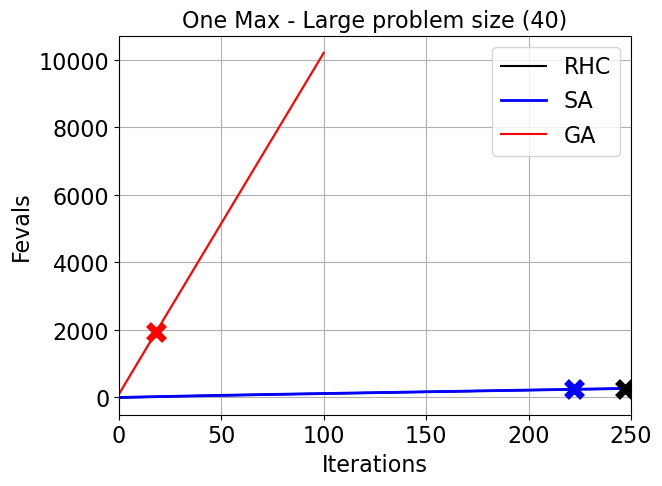

In [106]:
# Large problem size - Fevals

fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.17, 0.14, 0.80, 0.79])

ax.plot(df_fevals_large['Iteration'].values, df_fevals_large['mean'].values, label='RHC',color='k')
ax.fill_between(df_fevals_large['Iteration'].values, df_fevals_large['mean'].values + df_fevals_large['std'].values,
                df_fevals_large['mean'].values - df_fevals_large['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_mean'].values, 
        label='SA', color='b', linewidth=2)
ax.fill_between(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
                df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_mean'].values +
                df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_std'].values,  
                df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_mean'].values -
                df_sa_large[df_sa_large['Temperature']==0.001]['FEvals_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['FEvals_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['FEvals_mean'].values +
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['FEvals_std'].values, 
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['FEvals_mean'].values -
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['FEvals_std'].values, 
        alpha=0.2, color="r") 

#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_mean'].values +
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_std'].values, '--r')
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_mean'].values -
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['FEvals_std'].values, '--r')

ax.plot(247, 253.8, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(222, 242.2, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 18, 1927.3, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Large problem size (40)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 250)
plt.grid(True)
plt.show()
plt.close(fig)

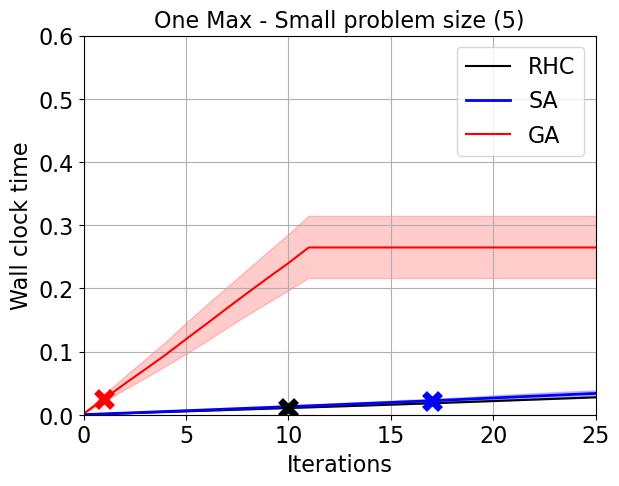

In [65]:
# Small problem size - Wall clock
fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_time_small['Iteration'].values, df_time_small['mean'].values, label='RHC',color='k')
ax.fill_between(df_time_small['Iteration'].values, df_time_small['mean'].values + df_time_small['std'].values, 
                df_time_small['mean'].values - df_time_small['std'].values, 
                alpha=0.2, color="k") 

ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values, 
        label='SA',color='b',linewidth=2)
ax.fill_between(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, alpha=0.2, color="b") 

ax.plot(df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_small[df_ga_small['Population Size']==15][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Time_std'].values, 
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_small[df_ga_small['Population Size']==50][df_ga_small['Mutation Rate']==0.2]['Time_std'].values, 
        alpha=0.2, color="r") 

#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_mean'].values +
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_std'].values,'--r')
#ax.plot(df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_mean'].values -
#        df_mmc_small[df_mmc_small['Population Size']==20][df_mmc_small['Keep Percent']==0.25]['Time_std'].values, '--r')

ax.plot(10, 0.010, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(17, 0.022, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 1, 0.025, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Small problem size (5)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
ax.set_ylim(0., 0.6)
ax.set_xlim(0, 25)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.grid(True)
plt.show()
plt.close(fig)

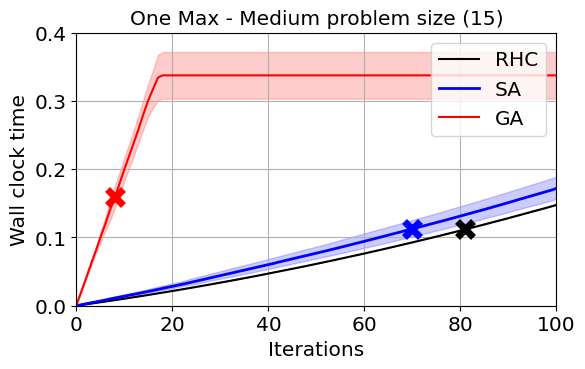

In [103]:
# Medium problem size - Time

fontsize = 14.5
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.14, 0.15, 0.80, 0.78])

ax.plot(df_time_medium['Iteration'].values, df_time_medium['mean'].values, label='RHC',color='k')
ax.fill_between(df_time_medium['Iteration'].values, df_time_medium['mean'].values + df_time_medium['std'].values, 
                df_time_medium['mean'].values - df_time_medium['std'].values, 
                alpha=0.2, color="k") 

ax.plot(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_mean'].values, 
        label='SA', color='b',linewidth=2)
ax.fill_between(df_sa_medium[df_sa_medium['Temperature']==0.001]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_std'].values, 
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==0.001]['Time_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Time_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Time_std'].values, 
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==50][df_ga_medium['Mutation Rate']==0.2]['Time_std'].values, 
        alpha=0.2, color="r")

#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_mean'].values +
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_std'].values,'--r')
#ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Iteration'].values, 
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_mean'].values -
#        df_mmc_medium[df_mmc_medium['Population Size']==50][df_mmc_medium['Keep Percent']==0.5]['Time_std'].values, '--r')

ax.plot(81, 0.112, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(70, 0.113, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 8,  0.159, 'x', color='r', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize, loc='upper right')
ax.set_title('One Max - Medium problem size (15)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
ax.set_ylim(0., 0.4)
ax.set_xlim(0, 100)
plt.grid(True)
plt.show()
fig.savefig('onemax_medium_time.png')
plt.close(fig)

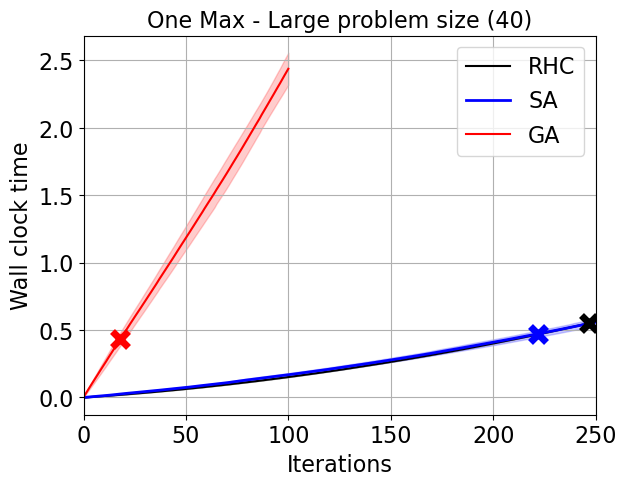

In [62]:
# Large problem size - Time

fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_time_large['Iteration'].values, df_time_large['mean'].values, label='RHC',color='k')
ax.fill_between(df_time_large['Iteration'].values, df_time_large['mean'].values + df_time_large['std'].values, 
                df_time_large['mean'].values - df_time_large['std'].values, 
                alpha=0.2, color="k") 

ax.plot(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.001]['Time_mean'].values, 
        label='SA', color='b', linewidth=2)
ax.fill_between(df_sa_large[df_sa_large['Temperature']==0.001]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_std'].values,
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.001]['Time_std'].values, alpha=0.2, color="b") 

ax.plot(df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Time_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Time_mean'].values +
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Time_std'].values,  
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Time_mean'].values -
        df_ga_large[df_ga_large['Population Size']==100][df_ga_large['Mutation Rate']==0.3]['Time_std'].values, 
        alpha=0.2, color="r") 

ax.plot(247, 0.551, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(222, 0.473, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(18, 0.434, 'x', color='r',  markersize=12, markeredgewidth=5)

#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_mean'].values, label='MIMIC', color='r')
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_mean'].values +
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_std'].values, '--r')
#ax.plot(df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Iteration'].values, 
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_mean'].values -
#        df_mmc_large[df_mmc_large['Population Size']==100][df_mmc_large['Keep Percent']==0.25]['Time_std'].values, '--r')

ax.legend(fontsize=fontsize)
ax.set_title('One Max - Large problem size (40)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 250)
plt.grid(True)
plt.show()
plt.close(fig)